## Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [9]:
!pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)


## Association Rules Method for Books Dataset

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [12]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\9_Association Rules\\book.csv")
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [25]:
# Apriori Algorithm

frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [26]:
# Level of Confidence and lift :
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [28]:
rules.sort_values("lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

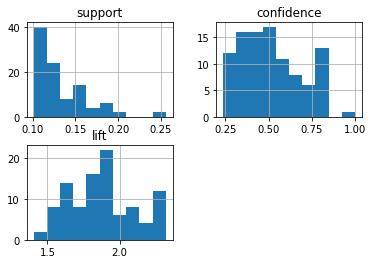

In [29]:
rules[["support","confidence","lift"]].hist()

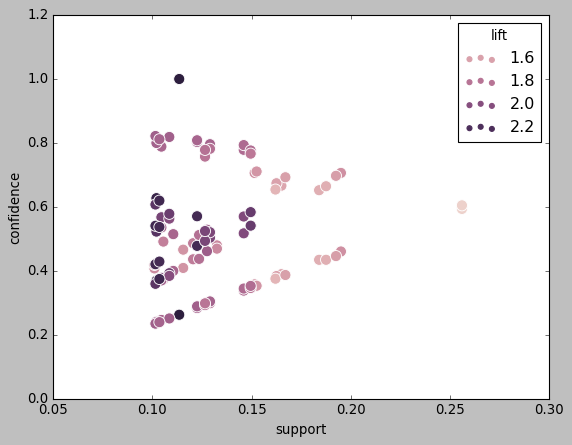

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
sns.scatterplot(data=rules,x='support',y='confidence',hue='lift', s= 100)
plt.show()

## Association rules for Movies data set

In [32]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [35]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\9_Association Rules\\my_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [41]:
data1 = data.iloc[:,5:]
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [44]:
# Apriori Algorithm

frequent_itemsets = apriori(data1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [45]:
# Level of Confidence and Lift :

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(LOTR2),"(Sixth Sense, Harry Potter1, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [46]:
rules.sort_values("lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
185,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
226,"(Harry Potter1, LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
196,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

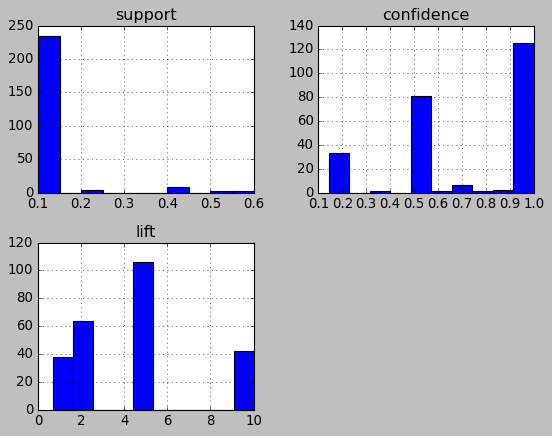

In [47]:
rules[['support','confidence','lift']].hist()

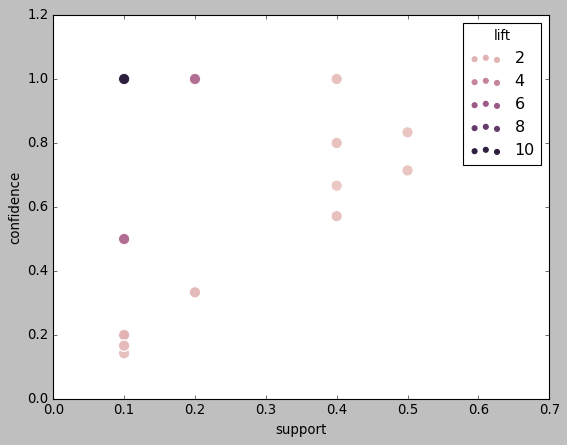

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
sns.scatterplot(data=rules,x='support',y='confidence',hue='lift', s= 100)
plt.show()